<a href="https://colab.research.google.com/github/sonalgaiwad/project-3/blob/main/my_projext_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Housing price predition & EDA project

# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# note...
# panda/numpy ---.> data handling
# matplotliob/sebron ----> data visualization
#sklearn--- clustering,regression, and ml tasks

In [ ]:
# data set load

from google.colab import files
uploaded = files.upload()

Saving project 3 housing_data.csv to project 3 housing_data (1).csv


In [ ]:
# READ DATASET (CHNAGE FILENAME IF NEEDED)

df = pd.read_csv("project 3 housing_data.csv")

In [ ]:
print("Dataset shape:",df.shape)
display(df.head())
display(df.describe())
print(df.info())

Dataset shape: (1460, 81)


,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,364.750000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,729.500000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1094.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1459.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#In Colab, the dataset has to be loaded.”
#Instead of display() it’s better to use print and df.head()

In [ ]:
# data cleaning

missing = df.isnull().sum().sort_values(ascending=False)
print ("missing values:")
print(missing[missing > 0])

# fill example: fill missing values for lotfrontage with median
if "lotfrontage" in df.columns:
  df["lotfrontage"] = df["lotfrontage"].fillna(df["lotfrontage"].median())

missing values:
Alley          1369
MasVnrType      872
GarageYrBlt      81
Electrical        1
dtype: int64


In [ ]:
# drop irrelevent colums

cols_to_drop = ["Alley", "PoolQC", "Fence", "MiscFeature"]
df = df.drop(columns =[col for col in cols_to_drop if col in df.columns])

In [ ]:
# DROP DUPLICATES

df = df.drop_duplicates()

In [ ]:
 #It is important to handle missing values otherwise, the analysis can be incorrect.
# - Irrelevant columns (mostly empty) were dropped for a clean dataset.
# - Duplicate rows were removed for accurate results.

In [ ]:
#EXPLORATORY DATA ANALYSIS (EDA) STARTS FROM HERE

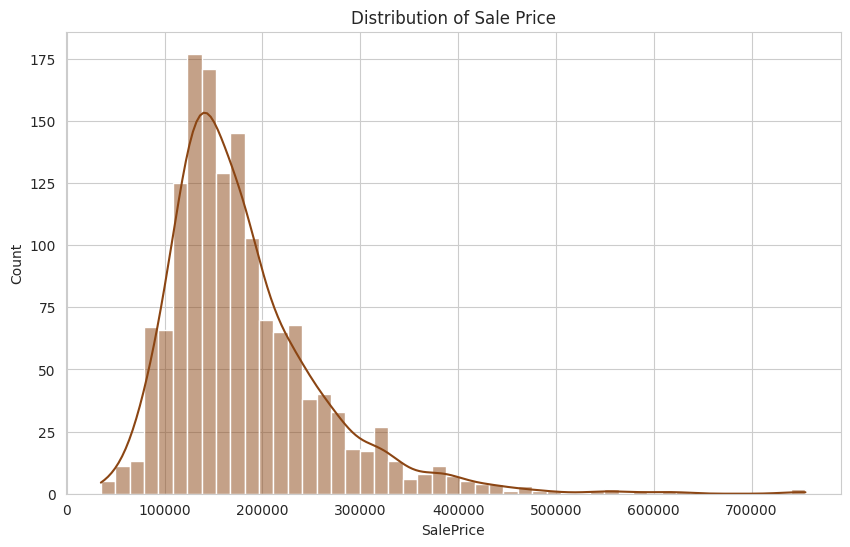

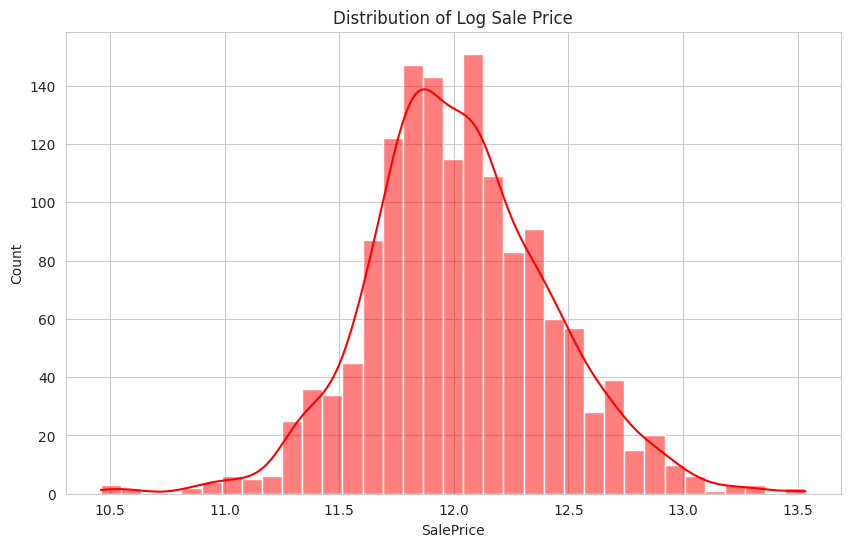

In [ ]:
plt.figure()
sns.histplot(df["SalePrice"], kde=True, color="saddlebrown")
plt.title("Distribution of Sale Price")
plt.show()

plt.figure()
sns.histplot(np.log1p(df["SalePrice"]), kde=True, color="red")
plt.title("Distribution of Log Sale Price")
plt.show()

In [ ]:
 # NOTES
# The distribution of SalePrice is right-skewed.
# A log transform was used to make the distribution closer to normal

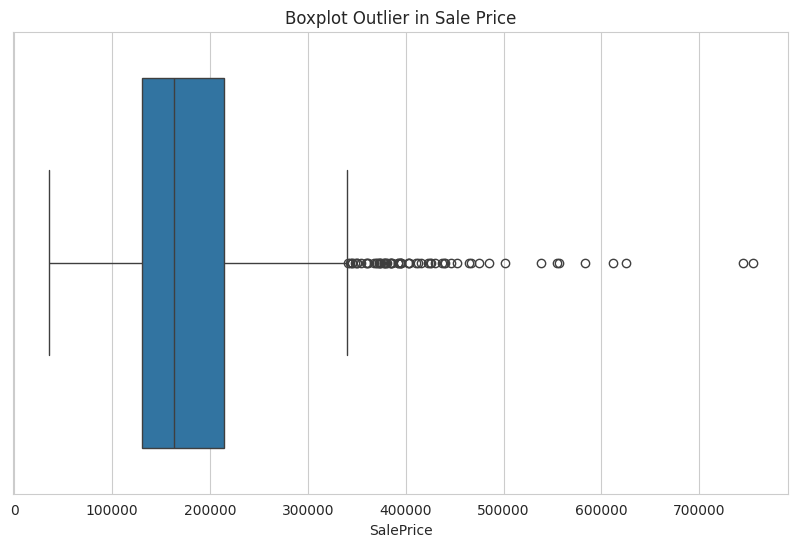

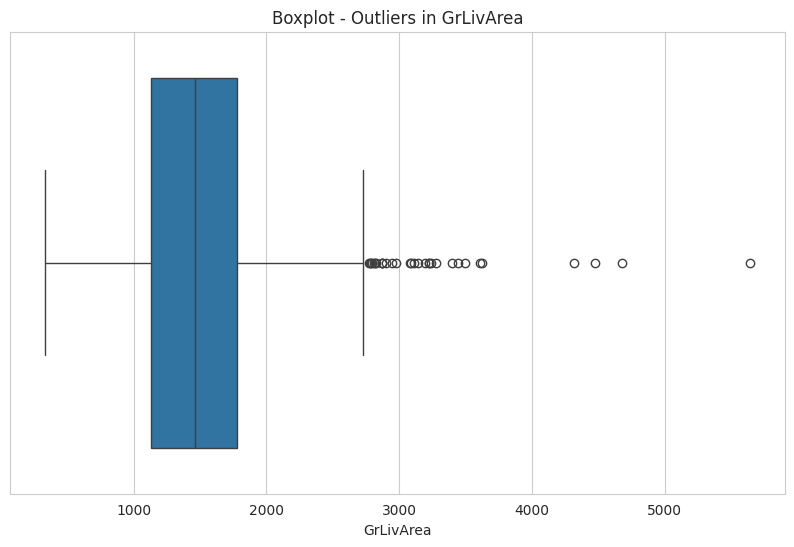

In [ ]:
# outlier detection

plt.figure()
sns.boxplot(x=df["SalePrice"])
plt.title("Boxplot Outlier in Sale Price")
plt.show()

plt.figure()
sns.boxplot(x=df["GrLivArea"])
plt.title("Boxplot - Outliers in GrLivArea")
plt.show()


In [ ]:
#NOTES:
# - Extreme values (outliers) can be detected using a boxplot.
# - Understanding outliers is important because they can disturb the model.

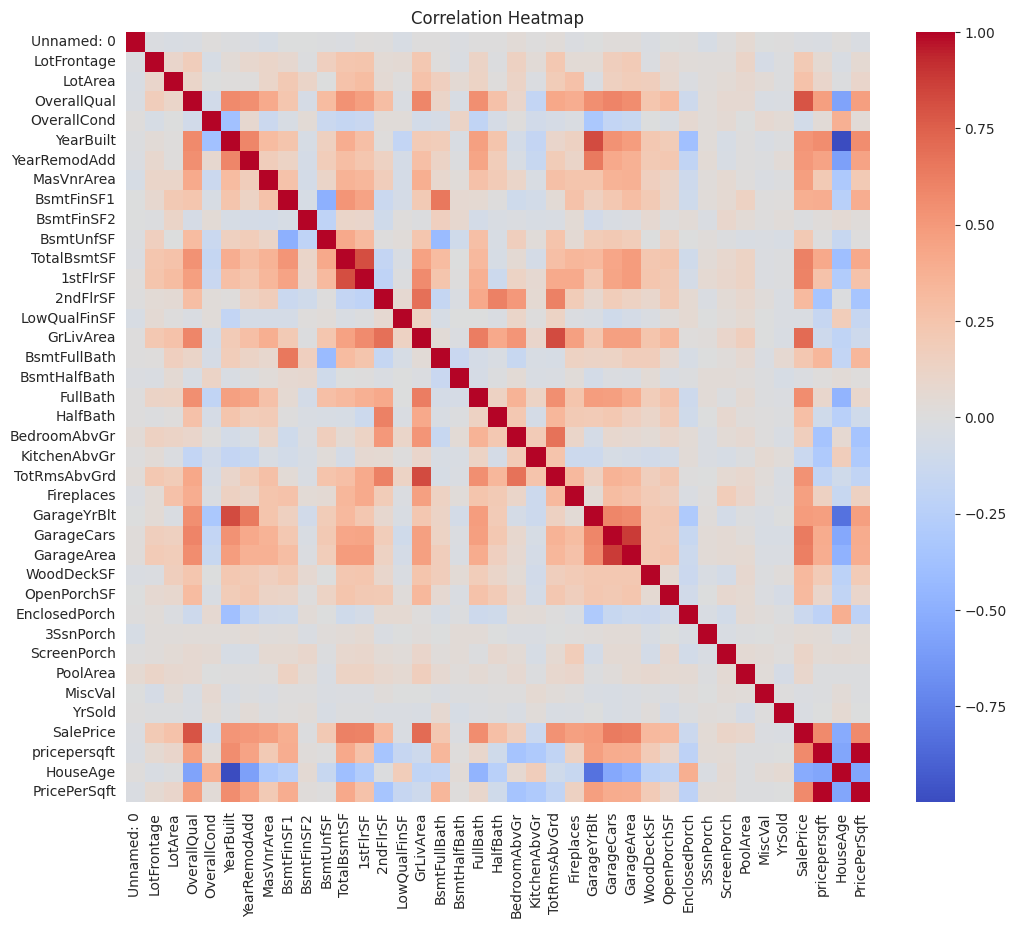

Top Feature Correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
pricepersqft    0.575505
PricePerSqft    0.575505
FullBath        0.560664
Name: SalePrice, dtype: float64


In [ ]:
# Correlation Analysis

num_df = df.select_dtypes(include=[np.number])
corr= num_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

top_corr = corr["SalePrice"].sort_values(ascending=False)
print("Top Feature Correlated with SalePrice:")
print(top_corr.head(10))

In [ ]:
#NOTES:
# - A heatmap helps to understand the relationships between features.
# - OverallQual, GrLivArea, and GarageCars are strongly correlated with SalePrice.

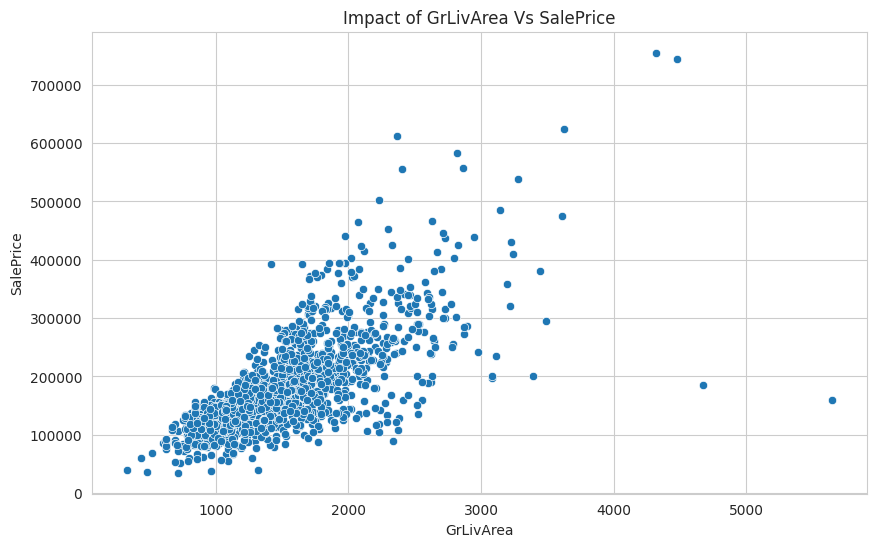

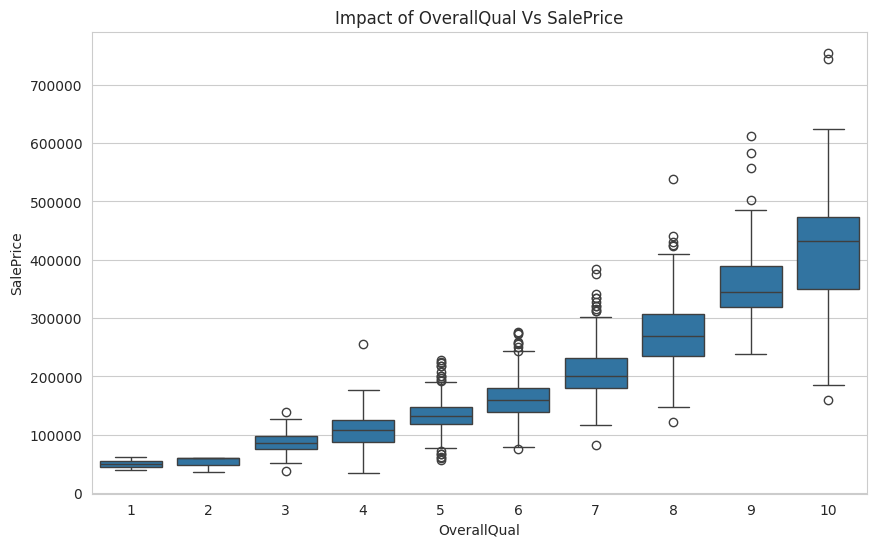

In [ ]:
# Feature Impact Analiysis

plt.figure()
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("Impact of GrLivArea Vs SalePrice")
plt.show()

plt.figure()
sns.boxplot(x="OverallQual", y="SalePrice", data=df)
plt.title("Impact of OverallQual Vs SalePrice")
plt.show()

In [ ]:
#NOTES:
#  Larger living area (GrLivArea) ..Higher SalePrice
#  Better quality rating (OverallQual) ...Higher SalePrice

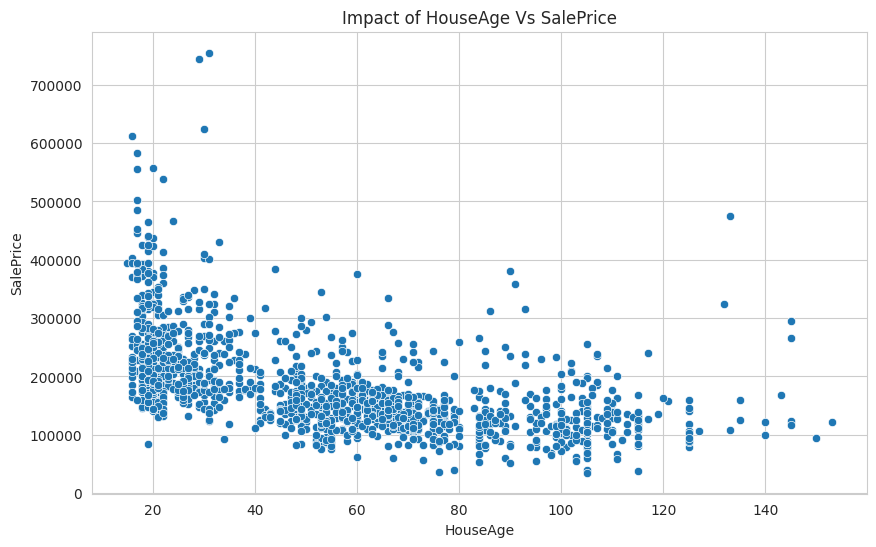

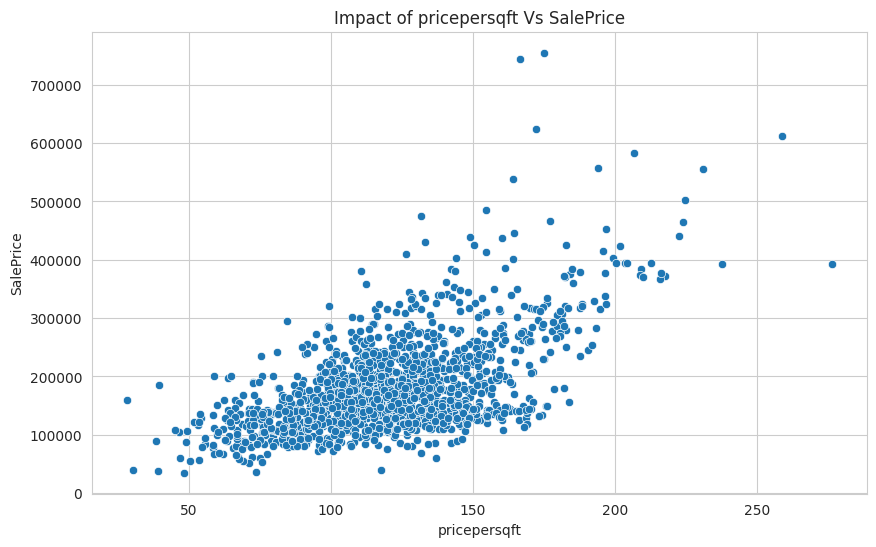

In [ ]:
# Feature Enginerring

df["pricepersqft"]= df["SalePrice"] / df["GrLivArea"]
df["HouseAge"] = 2025-df["YearBuilt"]

plt.figure()
sns.scatterplot(x="HouseAge", y="SalePrice", data=df)
plt.title("Impact of HouseAge Vs SalePrice")
plt.show()

plt.figure()
sns.scatterplot(x="pricepersqft", y="SalePrice", data=df)
plt.title("Impact of pricepersqft Vs SalePrice")
plt.show()

In [ ]:
# NOTES
#PricePerSqft is a useful metric for comparing properties.
# HouseAge helps understand the effect of a property's age on its price.

Average Sale Price by Year:
   YrSold      SalePrice
0    2006  182549.458599
1    2007  186063.151976
2    2008  177360.838816
3    2009  179432.103550
4    2010  177393.674286


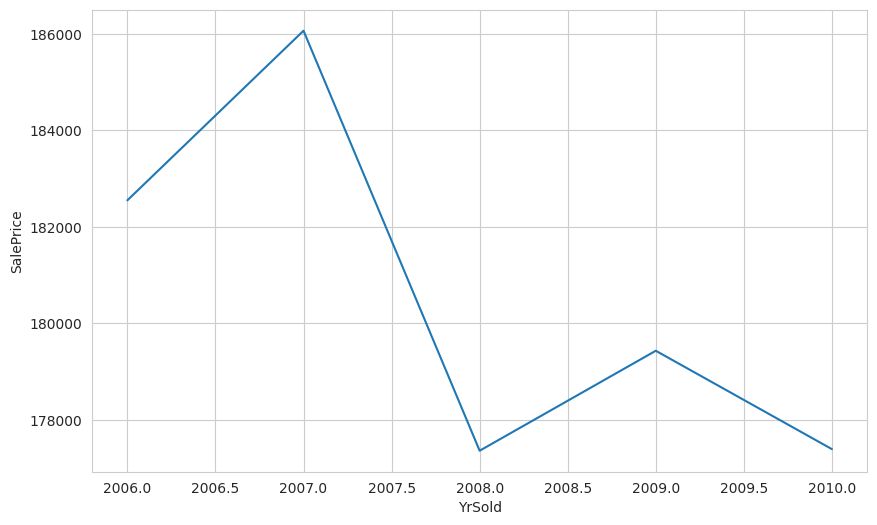

In [ ]:
# Market Trends

if "YrSold" in df.columns:
  trend = df.groupby("YrSold")["SalePrice"].mean().reset_index()
  plt.figure()
  sns.lineplot(x="YrSold", y="SalePrice", data=trend)
  print("Average Sale Price by Year:")
  print(trend)

In [ ]:
# NOTES
#The YrSold column helps understand whether prices have increased or decreased over time.
#Understanding market trends is important for future predictions.

In [ ]:
# Neighborhood Analysis

if "Nebghborhood" in df.columns:
  plt.figure(figsize=(14, 6))
  sns.boxplot(x="Neighborhood", y="SalePrice", data=df)
  plt.xticks(rotation=90)
  plt.title("Impact of Neighborhood Vs SalePrice")
  plt.show()


In [ ]:
#NOTES
#Neighborhood has a strong impact on house prices.
# Location is a key factor in real estate pricing.

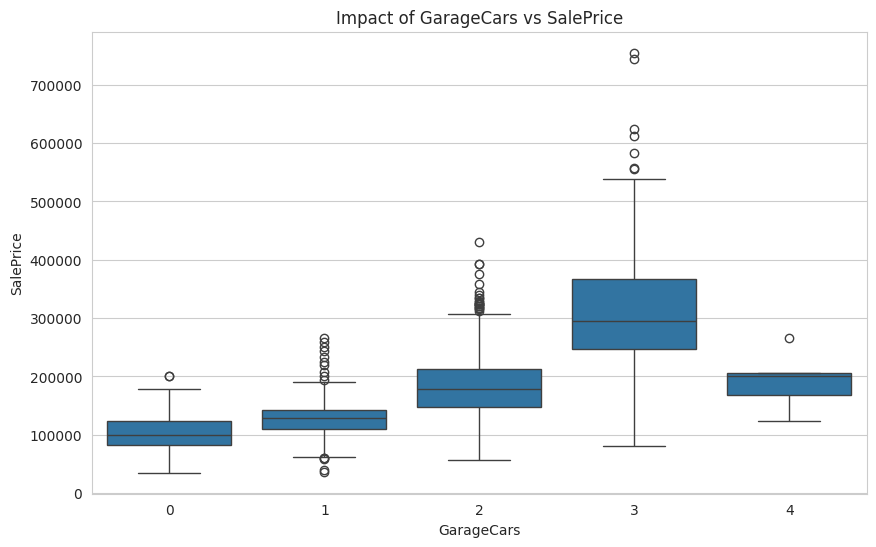

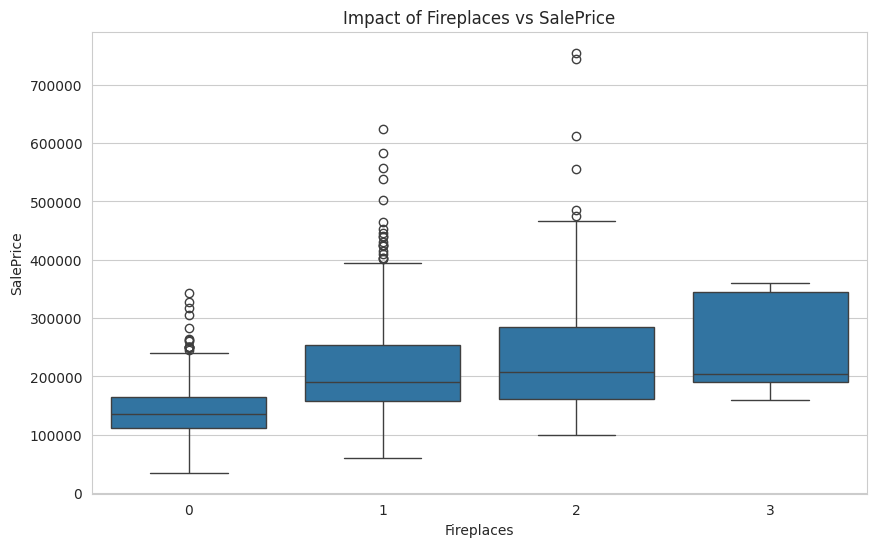

In [ ]:
# Amenities Impact

if 'GarageCars' in df.columns:
    plt.figure()
    sns.boxplot(x="GarageCars", y="SalePrice", data=df)
    plt.title("Impact of GarageCars vs SalePrice")
    plt.show()

if "Fireplaces" in df.columns:  # make sure no extra spaces
    plt.figure()
    sns.boxplot(x="Fireplaces", y="SalePrice", data=df)
    plt.title("Impact of Fireplaces vs SalePrice")
    plt.show()

In [ ]:
#NOTES
#Amenities like Fireplace and Garage increase the house value.
#Buyers consider them as premium features

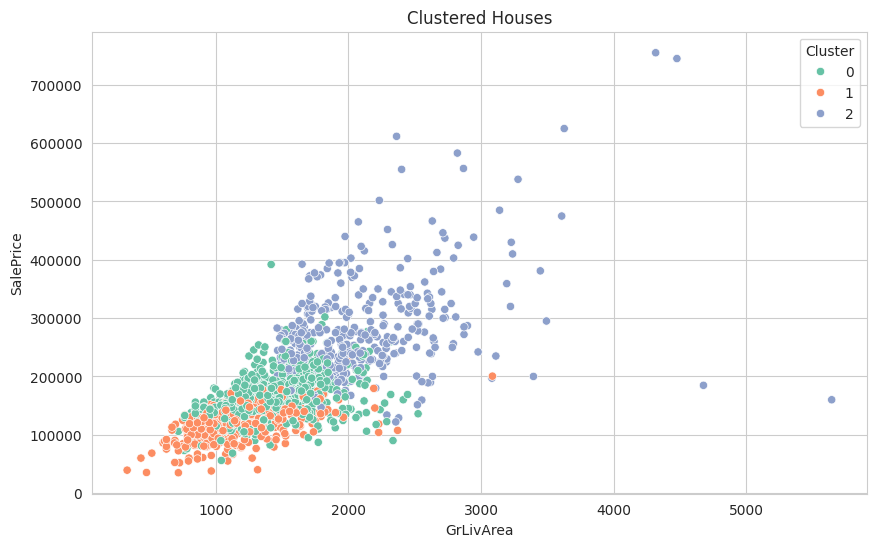

In [ ]:
# Clustering

features_for_cluster = df[['GrLivArea', 'OverallQual', 'GarageCars', 'SalePrice']].dropna()

X = features_for_cluster[['GrLivArea', 'OverallQual', 'GarageCars']]
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
features_for_cluster['Cluster'] = kmeans.fit_predict(scaled)

plt.figure()
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='Cluster', data=features_for_cluster, palette='Set2')
plt.title("Clustered Houses")
plt.show()

In [ ]:
#NOTES
#Clustering has grouped similar houses together.

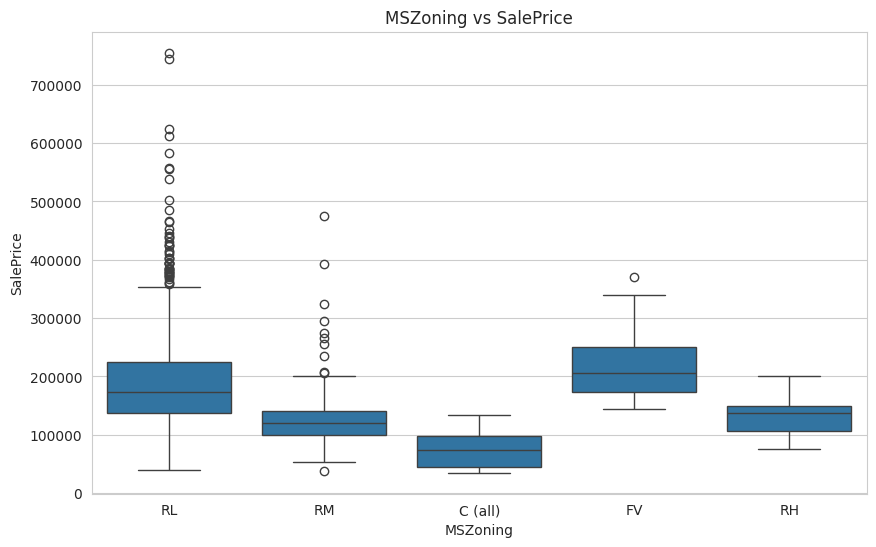

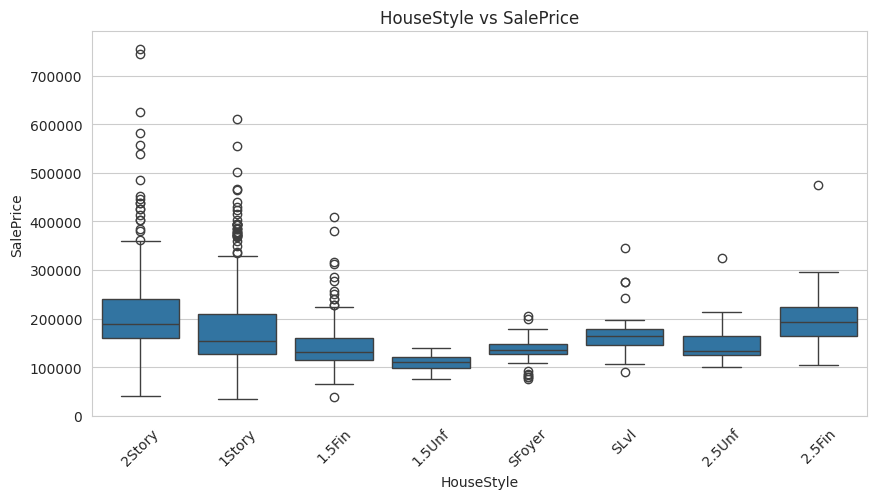

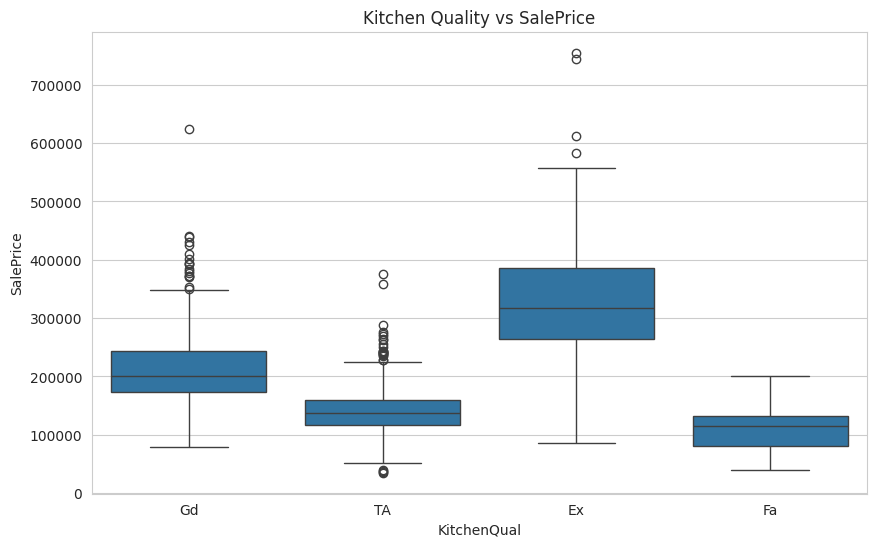

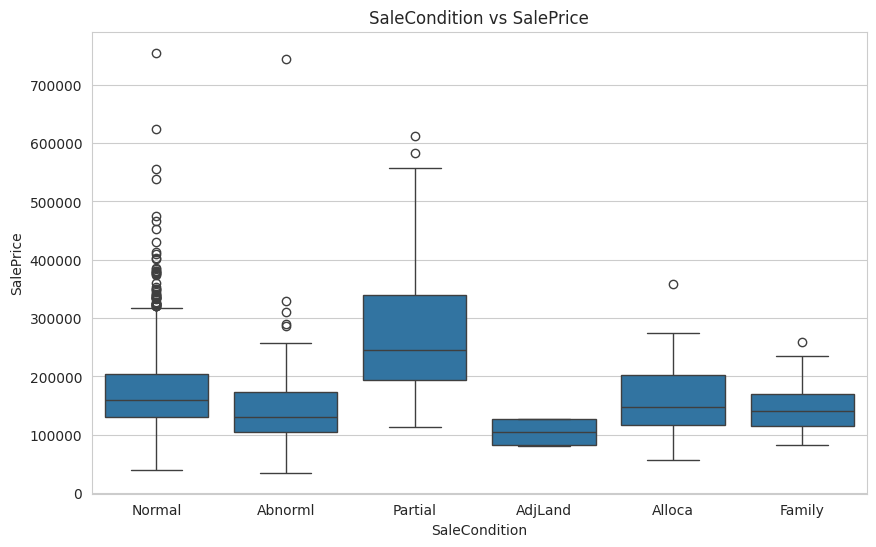

In [ ]:
#Categorical Feature Analysis** (important for 90+)

if 'MSZoning' in df.columns:
    sns.boxplot(x='MSZoning', y='SalePrice', data=df)
    plt.title("MSZoning vs SalePrice")
    plt.show()

if 'HouseStyle' in df.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='HouseStyle', y='SalePrice', data=df)
    plt.xticks(rotation=45)
    plt.title("HouseStyle vs SalePrice")
    plt.show()

if 'KitchenQual' in df.columns:
    sns.boxplot(x='KitchenQual', y='SalePrice', data=df)
    plt.title("Kitchen Quality vs SalePrice")
    plt.show()

if 'SaleCondition' in df.columns:
    sns.boxplot(x='SaleCondition', y='SalePrice', data=df)
    plt.title("SaleCondition vs SalePrice")
    plt.show()

In [ ]:
#NOTES
#Zoning and Style affect the market value.
 #If Kitchen quality is high, the price is also high.
# SaleCondition also impacts the price.


In [ ]:
# Regression Model
#Categorical encoding

df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['PricePerSqft'] = df['SalePrice'] / df['GrLivArea']

df_encoded = pd.get_dummies(df, drop_first=True)

features = ['GrLivArea', 'OverallQual', 'GarageCars', 'HouseAge', 'PricePerSqft']
X = df_encoded[features]
y = df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
#NOTES
 # R2 indicates how well the model fits, RMSE represents the average error

In [ ]:
print("\n Final Insights & Recommendations:")
print("Strongest drivers: OverallQual, GrLivArea, GarageCars")
print(" Categorical features like MSZoning, KitchenQual also impact price")
print(" Neighborhood & SaleCondition location/market trends explain karte hain")
print(" Feature engineering (PricePerSqft, HouseAge) ne understanding improve ki")
print(" Model performance acceptable hai, aur clusters se market segments clear hue")



 Final Insights & Recommendations:
Strongest drivers: OverallQual, GrLivArea, GarageCars
 Categorical features like MSZoning, KitchenQual also impact price
 Neighborhood & SaleCondition location/market trends explain karte hain
 Feature engineering (PricePerSqft, HouseAge) ne understanding improve ki
 Model performance acceptable hai, aur clusters se market segments clear hue
